### Preparation

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.linear_model as skl
import sklearn.preprocessing as skp
import os
from matplotlib import pyplot as plt
import copy as cp

BLUE_LIGHT = str('#00CCFF')
GREEN_LIGHT = str('#00CC00')
RED_LIGHT = str('#FF3333')
DATA_DIR = 'data'

In [3]:
data_df = pd.read_csv(os.path.join(DATA_DIR, 'covid_data.csv'))
                  #usecols=['date','case_by_day', 'case_by_time', 'death_by_day', 'death_by_time', 'recovered_by_time'])
data_df['case_by_time'] = data_df['case_by_time'] - data_df['recovered_by_time'] - data_df['death_by_time']

In [4]:
data_df = data_df.iloc[139:,:]
data_df['date'] -= 139

In [5]:
data_df.tail()

,date,case_by_day,case_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time,total_injected_by_time,once_injected_by_time,twice_injected_by_time
254,115,16369,330283,166,33515,28369,1465150,147350872,8606523,69457833
255,116,16106,331389,223,33738,14633,1479783,147638276,8453959,69685313
256,117,16260,338461,238,33976,8990,1488773,147678731,8493838,69685313
257,118,15556,349040,197,34173,12210,1500983,147722605,8537436,69685313
258,119,14596,273623,206,34379,89842,1590825,148350360,7980103,70313068


### Visualize

In [108]:
X_date = np.array(data_df['date'].values)
Y_cases =  np.array(data_df['case_by_day'].values)
Y_deaths = np.array(data_df['death_by_day'].values)
Y_recovered = np.array(data_df['recovered_by_time'].values)

print(X_date)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


In [117]:
# Smooth 7 day - average
def smooth_helper(data_array, k = 7):
    copy = cp.deepcopy(data_array)
    for i in range(int(k/2), len(data_array) - int(k/2)):
        temp = 0
        for j in range(k):
            temp += float(copy[i + j - int(k/2)] / k)
        copy[i] = int(temp)
    return copy.reshape(-1,)

def smooth(data_array, k = 7):
    copy = cp.deepcopy(data_array)
    for col_index in range(data_array.shape[1]):
        copy[:,col_index] = smooth_helper(copy[:,col_index], k)
    return copy


In [118]:
# Draw
def drawCase(X, Y, color):
        plt.figure(figsize=(9,3))
        
        ax = plt.axes()
        #ax.grid(linewidth=0.4, color='#8f8f8f') 
        
        #ax.set_facecolor("black") 
        ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
        ax.set_ylabel('Number of Confirmed Cases\n',
                size=25,color='#4bb4f2')
        
        ax.plot(X,Y,
                color=color,
                linewidth=4,
                markersize=15,
                markeredgecolor=RED_LIGHT)

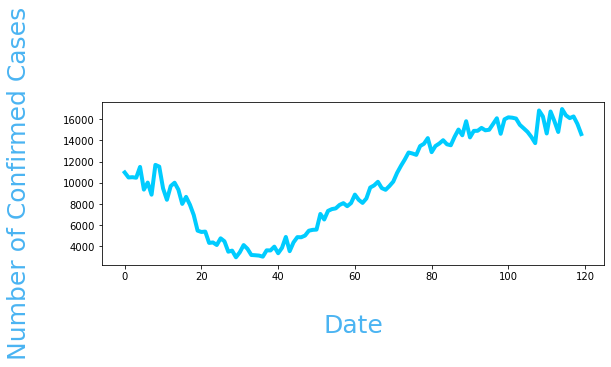

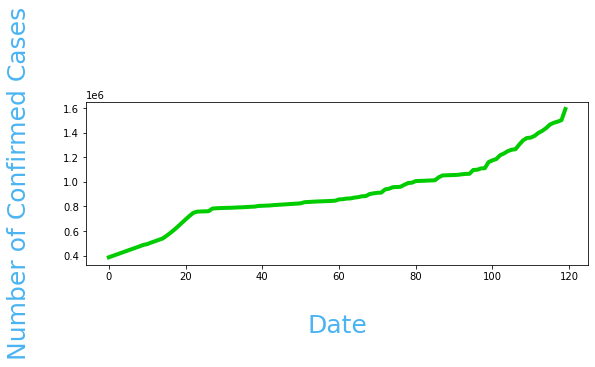

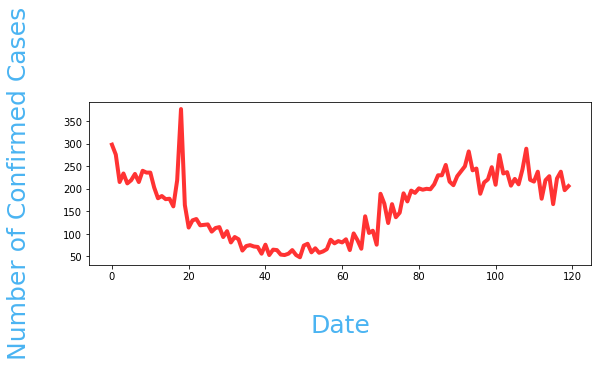

In [119]:
drawCase(X_date, Y_cases, BLUE_LIGHT)
drawCase(X_date, Y_recovered, GREEN_LIGHT)
drawCase(X_date, Y_deaths, RED_LIGHT)

#### Smooth graph

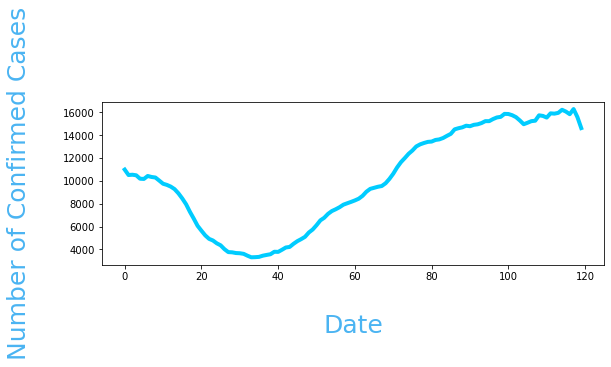

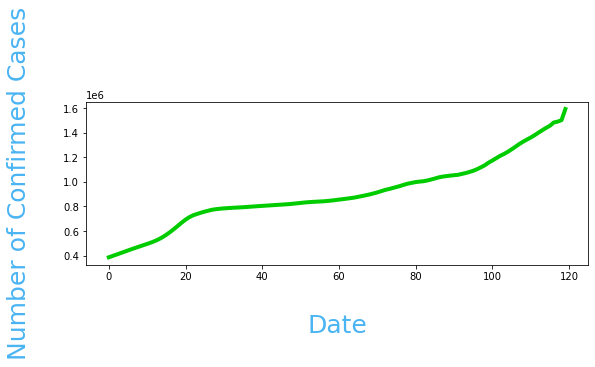

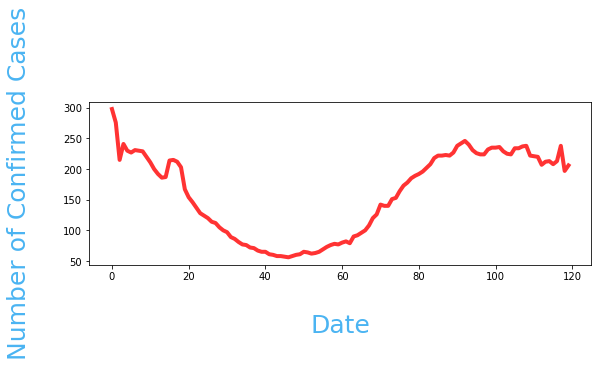

In [129]:
Y_cases_smooth = smooth(Y_cases.reshape(-1,1)).reshape(-1,)
Y_recovered_smooth = smooth(Y_recovered.reshape(-1,1)).reshape(-1,)
Y_deaths_smooth = smooth(Y_deaths.reshape(-1,1)).reshape(-1,)

drawCase(X_date, Y_cases_smooth, BLUE_LIGHT)
drawCase(X_date, Y_recovered_smooth, GREEN_LIGHT)
drawCase(X_date, Y_deaths_smooth, RED_LIGHT)

## Linear Regression

In [157]:
DAY = 150
future = list(range(DAY))

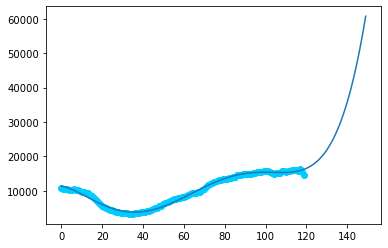

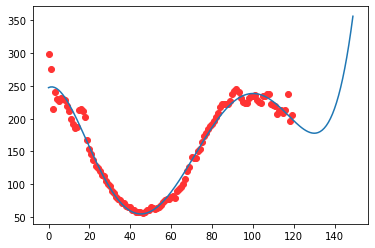

In [144]:
casesModel = np.poly1d(np.polyfit(X_date, Y_cases_smooth, 5))
deathsModel = np.poly1d(np.polyfit(X_date, Y_deaths_smooth, 5))


plt.scatter(X_date, Y_cases_smooth, c=BLUE_LIGHT)
plt.plot(future, casesModel(future))
plt.show()

plt.scatter(X_date, Y_deaths_smooth, c=RED_LIGHT)
plt.plot(future, deathsModel(future))
plt.show()



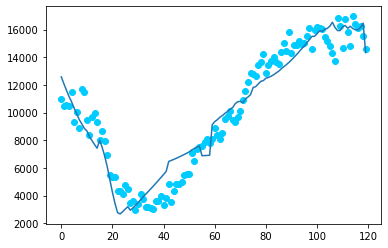

[[     0 220558]
 [     1 219653]
 [     2 218802]
 [     3 217919]
 [     4 218086]
 [     5 216101]
 [     6 214765]
 [     7 212303]
 [     8 212634]
 [     9 211998]
 [    10 214998]
 [    11 210811]
 [    12 209728]
 [    13 208067]
 [    14 206694]
 [    15 238687]
 [    16 223601]
 [    17 205891]
 [    18 185190]
 [    19 161544]
 [    20 137837]
 [    21 115309]
 [    22  93811]
 [    23  87927]
 [    24  90425]
 [    25  93956]
 [    26  96867]
 [    27  78733]
 [    28  79524]
 [    29  80949]
 [    30  82984]
 [    31  86203]
 [    32  88857]
 [    33  90239]
 [    34  91863]
 [    35  93652]
 [    36  94621]
 [    37  96320]
 [    38  98203]
 [    39  96712]
 [    40  98523]
 [    41 100906]
 [    42 254859]
 [    43 255211]
 [    44 257310]
 [    45 260215]
 [    46 262504]
 [    47 264890]
 [    48 267933]
 [    49 271150]
 [    50 273413]
 [    51 271112]
 [    52 275310]
 [    53 279895]
 [    54 284779]
 [    55 335369]
 [    56 341531]
 [    57 347575]
 [    58 35346

In [169]:
X = data_df[['date', 'case_by_time']].values
Y = Y_cases_smooth


poly = skp.PolynomialFeatures(degree = 3, include_bias=False)
X_poly = poly.fit_transform(X)
regr = skl.LinearRegression()
regr.fit(X_poly, Y)

plt.scatter(X_date, Y_cases, c=BLUE_LIGHT)
plt.plot(X_date, regr.predict(X_poly))

plt.show()

predict = np.zeros((DAY, X.shape[-1]), dtype=int)
predict[:120,:] = X
for i in range(120, len(predict)):
    




